In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Ejercicio**

Suponga que es un diseñador de modas, y quisiera diseñar una nueva serie de pantalonetas tipo bermuda. Uno de los problemas en diseño es que se necesita crear una serie de tamaños que se ajuste a la mayoría de personas. Esencialmente, se necesita tener una serie de tamaños de personas con diferente:
* Circunferencia de la cintura
* longitud de la parte superior de la pierna

Así que, cómo encuentra la combinación de tamaños adecuada?

Lo primero que debe hacer es conseguir un conjunto de datos que contiene las medidas de un grupo de personas (de cierta edad abarcar). Con este conjunto de datos, puede aplicar el algoritmo K-Means para agrupar estos personas en grupos en función de la medida específica de las partes de su cuerpo. Una vez se encuentran los grupos, ahora tendrá una imagen muy clara de los tamaños para
que necesitas diseñar.

1. Cargue el dataset BMX_G.csv y encuentre sus dimensiones

In [2]:
df = pd.read_csv("/content/BMX_G.csv")

In [3]:
df.head()

,Unnamed: 0,seqn,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmihead,bmxht,bmiht,bmxbmi,bmdbmic,bmxleg,bmileg,bmxarml,bmiarml,bmxarmc,bmiarmc,bmxwaist,bmiwaist,bmxsad1,bmxsad2,bmxsad3,bmxsad4,bmdavsad,bmdsadcm
0,1,62161,1,69.2,NaN,NaN,NaN,NaN,NaN,172.3,NaN,23.3,NaN,40.2,NaN,35.0,NaN,32.5,NaN,81.0,NaN,17.7,17.9,NaN,NaN,17.8,NaN
1,2,62162,1,12.7,NaN,95.7,NaN,NaN,NaN,94.7,NaN,14.2,2.0,NaN,NaN,18.5,NaN,16.6,NaN,45.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,62163,1,49.4,NaN,NaN,NaN,NaN,NaN,168.9,NaN,17.3,2.0,40.3,NaN,36.3,NaN,22.0,NaN,64.6,NaN,15.6,15.5,NaN,NaN,15.6,NaN
3,4,62164,1,67.2,NaN,NaN,NaN,NaN,NaN,170.1,NaN,23.2,NaN,40.5,NaN,37.2,NaN,29.3,NaN,80.1,NaN,18.3,18.5,NaN,NaN,18.4,NaN
4,5,62165,1,69.1,NaN,NaN,NaN,NaN,NaN,159.4,NaN,27.2,3.0,42.1,NaN,35.2,NaN,29.7,NaN,86.7,NaN,21.0,20.8,NaN,NaN,20.9,NaN


In [4]:
df.shape

(9338, 27)

2. Encuentre cuántos valores NA están en cada variable

In [7]:
df.isnull().sum()

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

3. Nuestras variables de interés son

* BMXWAIST: circunferencia de la cintura (cm)
* BMXLEG: Longitud superior de la pierna (cm)

Establezca X como el data frame que contenga estas dos variables, omitiendo los valores NA.

In [25]:
X = df[["bmxleg","bmxwaist"]]

In [26]:
X = X.dropna(subset=["bmxleg","bmxwaist"])

In [27]:
X.shape

(6899, 2)

In [28]:
X.head()

,bmxleg,bmxwaist
0,40.2,81.0
2,40.3,64.6
3,40.5,80.1
4,42.1,86.7
5,31.0,59.8


4. Elabore un diagrama de dispersión mostrando la distribución de "circunferencia de la cintura" vs "la parte superior de la pierna"

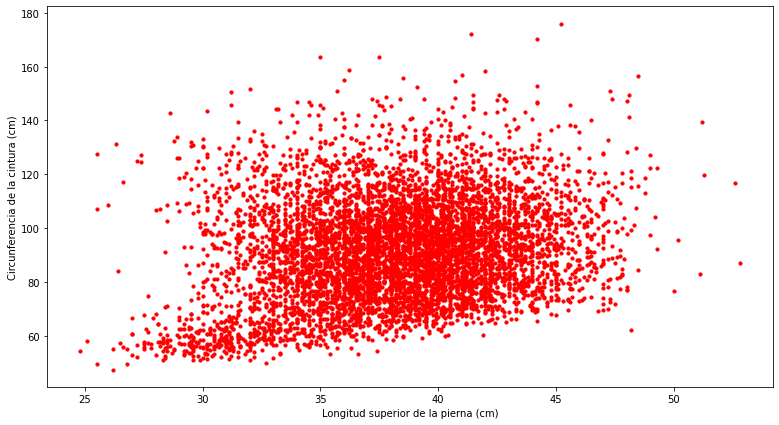

In [29]:
plt.figure(figsize=(13,7))
plt.scatter(X["bmxleg"],X["bmxwaist"],c="r",s=10)
plt.xlabel("Longitud superior de la pierna (cm)")
plt.ylabel("Circunferencia de la cintura (cm)")
plt.show()

5. Ajuste el modelo KMeans usando


```
from sklearn.cluster import KMeans
```
Luego ajuste el modelo con el nombre kmeans (con dos cluster), cree un vector que se llame "etiq" el cual contiene las predicciones del modelo sobre X. Luego halle los centroides de cada cluster.


In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(X)
etiq = kmeans.predict(X)
centroides = kmeans.cluster_centers_

6. Cree una lista de colores c=["b","r","y","g","c","m"] y, a continuación, una lista llamada colores que guarde un color por cada etiqueta

In [32]:
c = ["b","r","y","g","c","m"]
colores = [c[i] for i in etiq]

7. Dibuje un diagrama de dispersión.

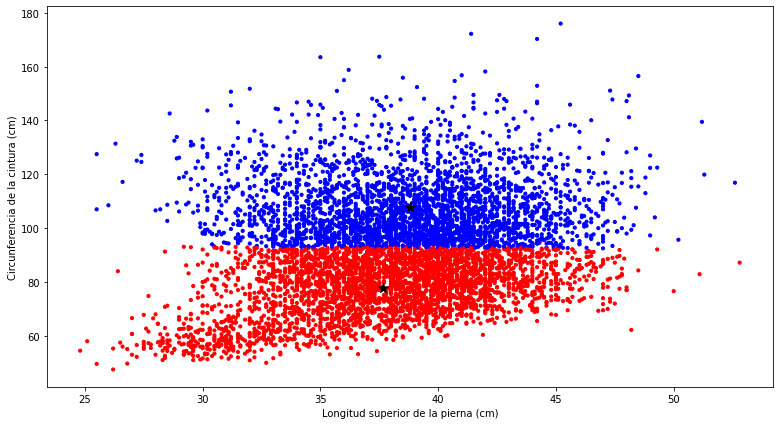

In [33]:
plt.figure(figsize=(13,7))
plt.scatter(X["bmxleg"],X["bmxwaist"],c=colores,s=10)
plt.scatter(centroides[:,0],centroides[:,1],marker="*",s=100,c="black")
plt.xlabel("Longitud superior de la pierna (cm)")
plt.ylabel("Circunferencia de la cintura (cm)")
plt.show()

8. Identifique los centroides e interprételos.

In [34]:
print(centroides)

[[ 38.82089645 107.84497682]
 [ 37.6496179   77.77778384]]


9. Encuentre el número óptimo de clusters.

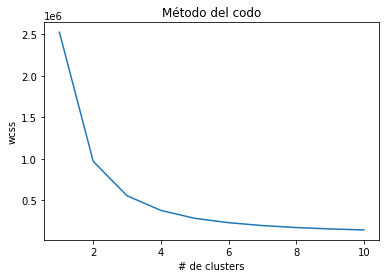

In [35]:
err_sum =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  err_sum.append(kmeans.inertia_)
plt.plot(range(1,11),err_sum)
plt.title("Método del codo")
plt.xlabel("# de clusters")
plt.ylabel("wcss")
plt.show()

10. Suponga que la empresa quería que tuviera más agrupaciones para que pudiera acomodar una gama más amplia de clientes. En particular, la empresa cree que cuatro es el número de clusters más adecuado. 
Trace el diagrama de dispersión señalando los centroides. Calcule e interprete los centroides.

In [36]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(X)
etiq = kmeans.predict(X)
centroides = kmeans.cluster_centers_

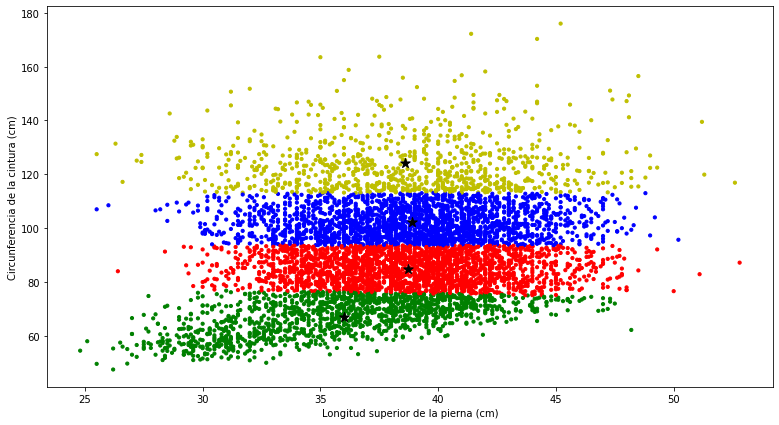

In [37]:
c = ["b","r","y","g","c","m"]
colores = [c[i] for i in etiq]

plt.figure(figsize=(13,7))
plt.scatter(X["bmxleg"],X["bmxwaist"],c=colores,s=10)
plt.scatter(centroides[:,0],centroides[:,1],marker="*",s=100,c="black")
plt.xlabel("Longitud superior de la pierna (cm)")
plt.ylabel("Circunferencia de la cintura (cm)")
plt.show()